# California Housing Prices
Median house prices for California districts derived from the 1990 census.

<img src="./input/vita-vilcina-KtOid0FLjqU-unsplash.jpg" style="height:400px">

Photo by [Vita Vilcina](https://unsplash.com/@vivivi)

## Context
This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.


## Acknowledgements
Please refer to the [Kaggle challenge web page](https://www.kaggle.com/camnugent/california-housing-prices)

## Inspiration
predict a real estate price

___

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import folium

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import Lasso, LinearRegression, Ridge, RANSACRegressor, SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

In [4]:
file_path = os.path.join('input', 'house_big.csv')
df = pd.read_csv(file_path)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [5]:
df.shape

(20640, 10)

## Content
The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:
* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are few missing value int the 'total_bedrooms' column. Now let's see the basic stats for the numerical columns:

In [7]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [8]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Cleaning data

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
print(f'percentage of missing values: {df.total_bedrooms.isnull().sum() / df.shape[0] * 100 :.2f}%')

percentage of missing values: 1.00%


In [12]:
df = df.fillna(df.median())
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## Dealing with geospatial infos
Visualization of the data in a scatter plot in a "geographic way"

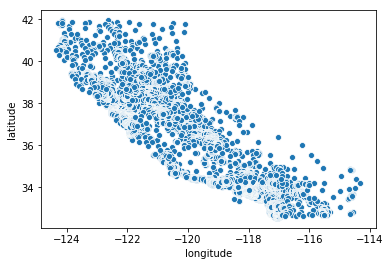

In [13]:
sns.scatterplot(df.longitude, df.latitude)

Same plot but this time with a varying size of the data points based on `population` variable and a different color depending of the real estate price (`median_house_value`)

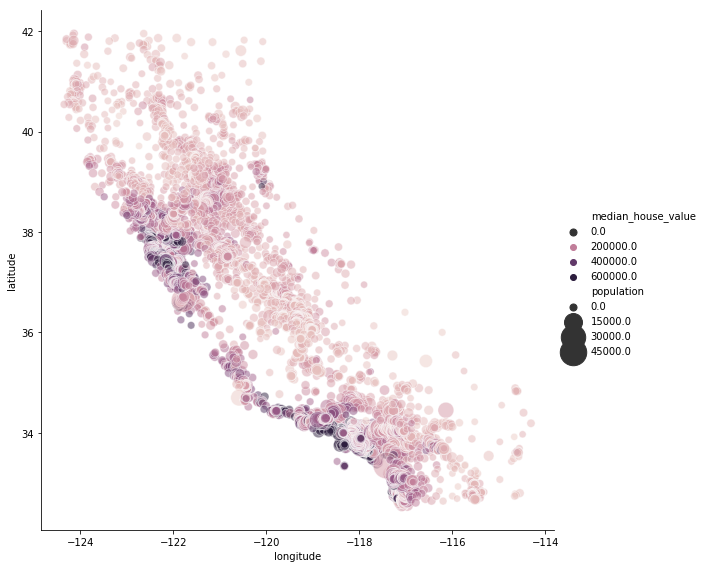

In [14]:
sns.relplot(x="longitude", y="latitude", hue="median_house_value", size="population", alpha=.5,\
            sizes=(50, 700), data=df, height=8)
plt.show()

In [15]:
# Create a map with folium centered at the mean latitude and longitude
cali_map = folium.Map(location=[35.6, -117], zoom_start=6)

# Display the map
display(cali_map)

In [16]:
# Add markers for each rows
for i in range(df.shape[0]):
    folium.Marker((float(df.iloc[i, 1]), float(df.iloc[i, 0]))).add_to(cali_map) 
    
# Display the map
display(cali_map)

## Target analysis

/home/sunflowa/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


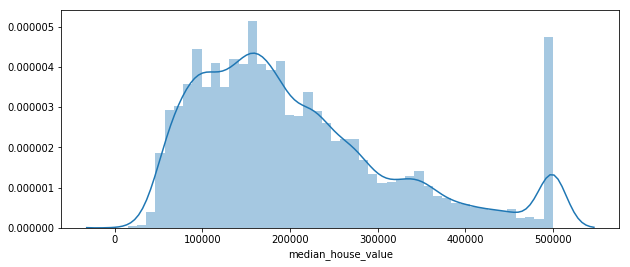

In [17]:
plt.figure(figsize=(10, 4))
sns.distplot(df.median_house_value)
plt.show()

Variations depending on the proximity with ocean

In [18]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

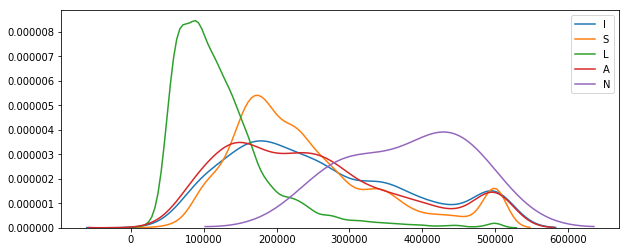

In [19]:
plt.figure(figsize=(10, 4))
for prox in df.ocean_proximity.unique():
    sns.kdeplot(data=df[df.ocean_proximity == prox].median_house_value)
    plt.legend(prox)
plt.show()

## Other analysis

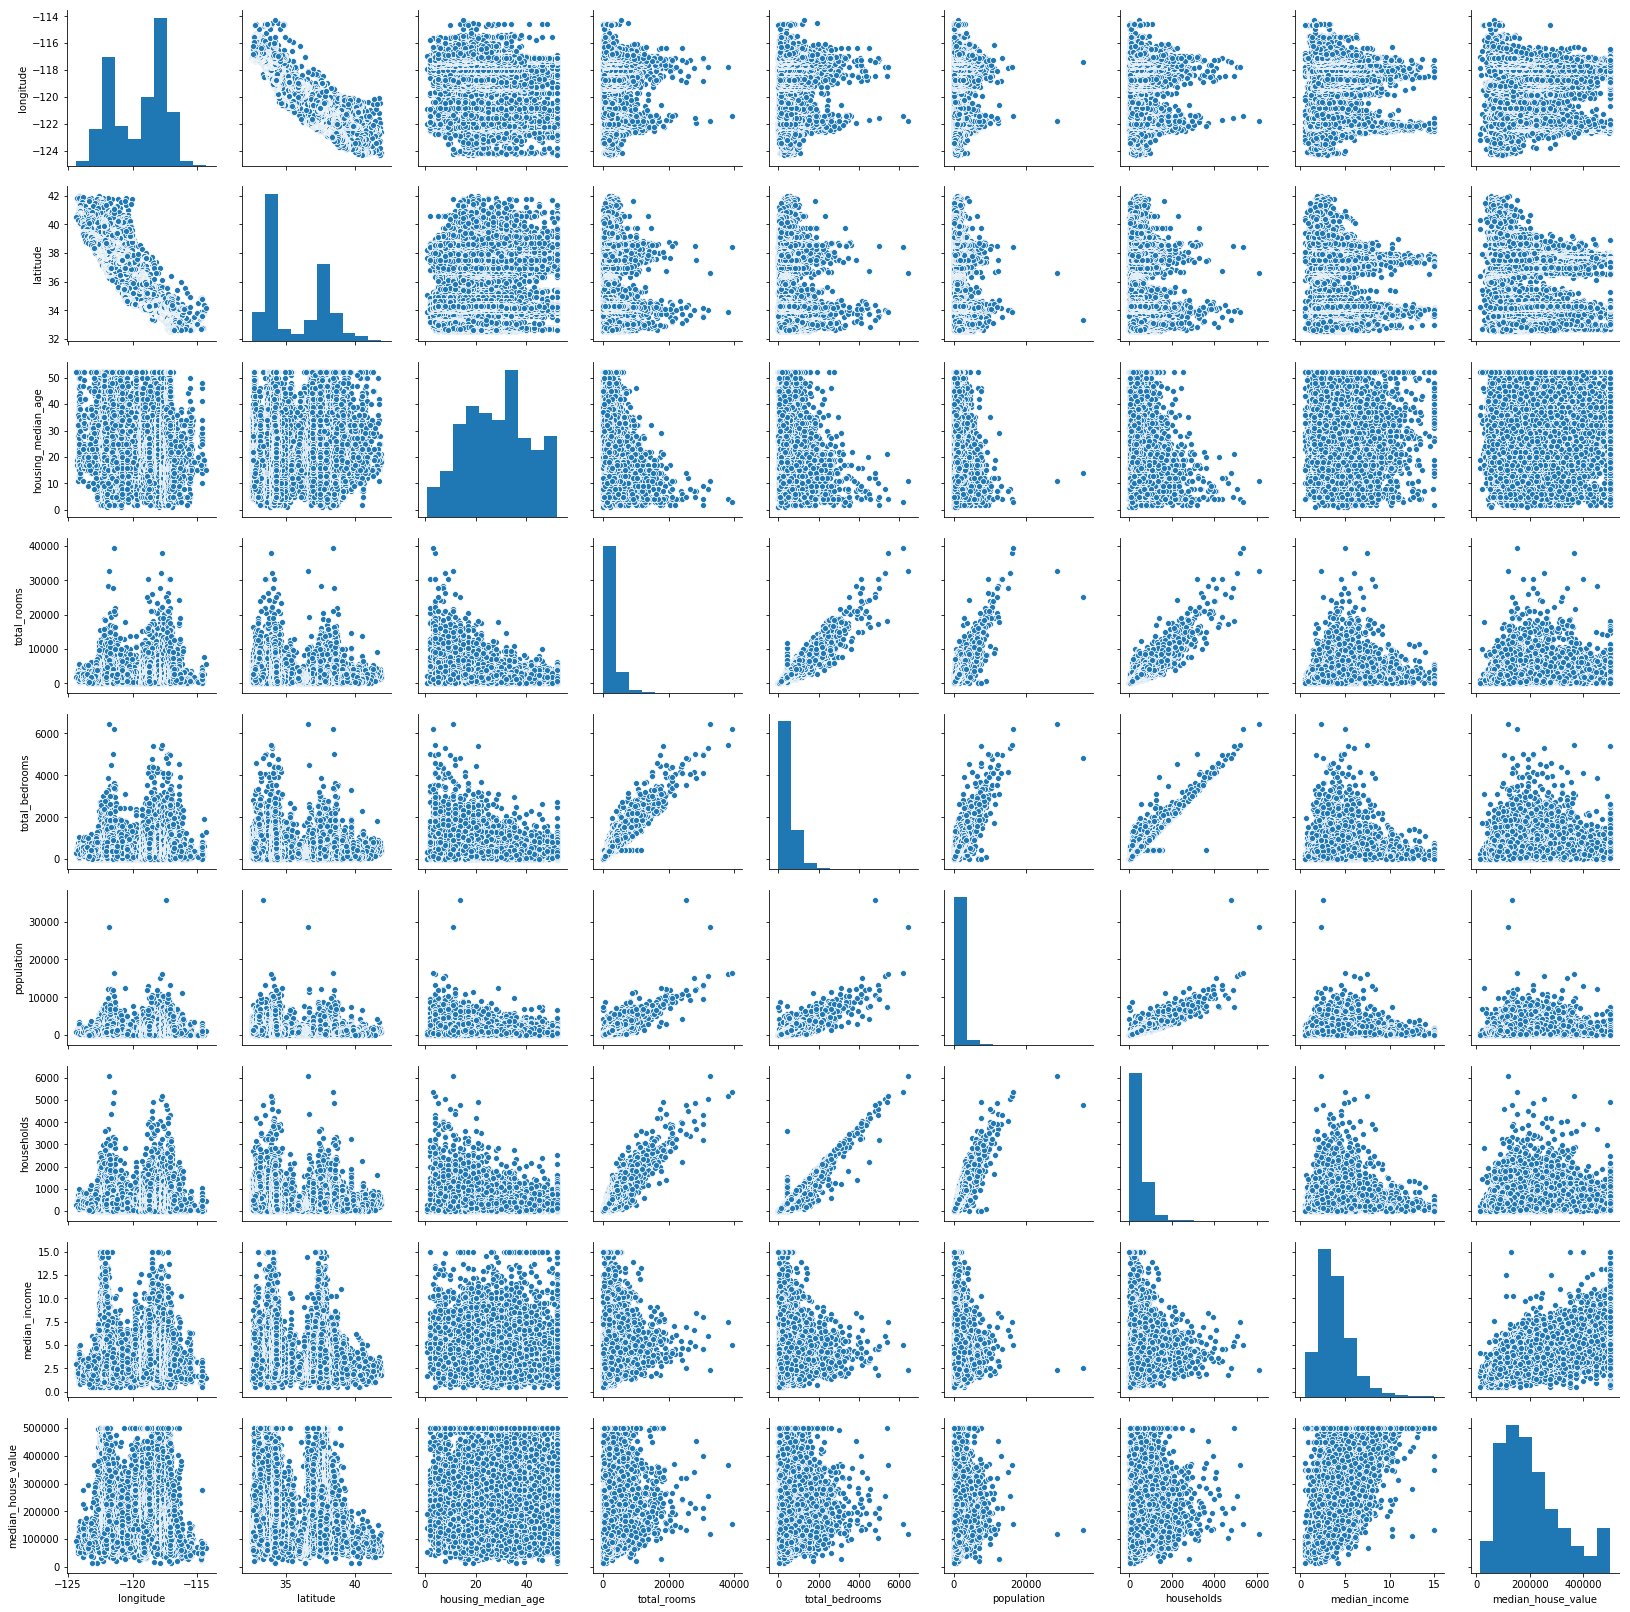

In [20]:
sns.pairplot(df)
plt.show()

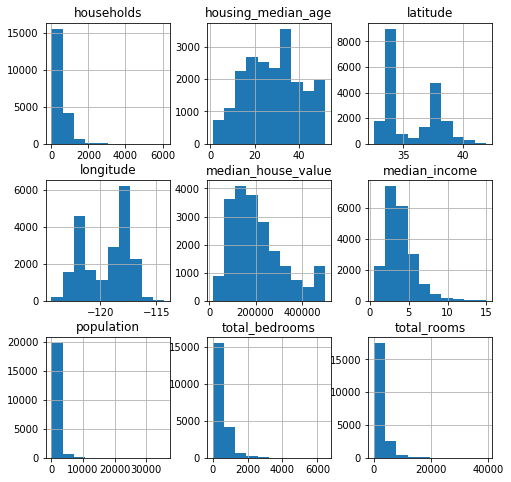

In [21]:
df.hist(figsize=(8, 8))
plt.show()

## Correlations

In [22]:
corr = df.corr()
corr

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069120 -0.066484           -0.319026     0.927058   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069120    0.099773    0.055310      -0.015176   
latitude                 -0.066484   -0.108785   -0.071035      -0.079809   
housing_median_age       -0.319026   -0.296244   -0.302916      -0.119034   
total_rooms               0.927058    0.857126    0.918484       0.198050   
total_bedrooms            1.000000    0.873535    0.974366      -0.007617   
population                0.873535    1.000000    0.907222       0.004834   
households                0.974366    0.907222    1.000000       0.013033   
median_income            -0.007617    0.004834    0.013033       1.000000   
median_house_value        0.049457   -0.024650    0.065843       0.688075   

                    median_house_value  
longitude                    -0.045967  
latitude                     -0.144160  
housing_median_age            0.105623  
total_rooms                   0.134153  
total_bedrooms                0.049457  
population                   -0.024650  
households                    0.065843  
median_income                 0.688075  
median_house_value            1.000000

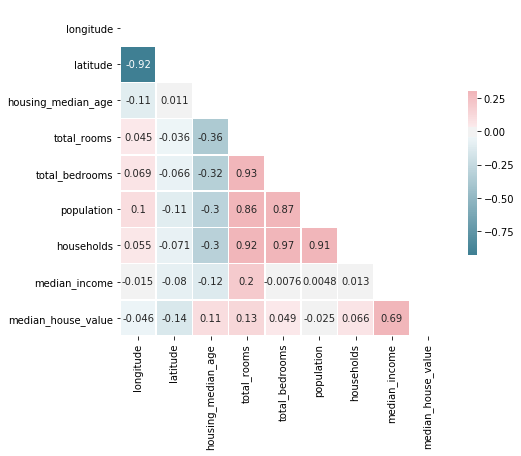

In [23]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

* lat and log are highly positively correlated
* total_bedrooms, population and householdsare highly positively correlated too
* median_income and median_house_value are also positively correlated

which make sense.

---

# Models training and predictions

## Data preparation

Label encoding of categorical feature (ocean proximity)

In [24]:
df = pd.get_dummies(data=df, columns=['ocean_proximity'], drop_first=False)
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value  \
0       322.0       126.0         8.3252            452600.0   
1      2401.0      1138.0         8.3014            358500.0   
2       496.0       177.0         7.2574            352100.0   
3       558.0       219.0         5.6431            341300.0   
4       565.0       259.0         3.8462            342200.0   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1                          0                       0                       0   
2                          0                       0                       0   
3                          0                       0                       0   
4                          0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
1                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0

In [63]:
feat_removed = ['median_house_value']

# removed 
#['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income',
#'median_house_value', 'ocean_proximity']

In [64]:
y = df.median_house_value
X = df.drop(columns=feat_removed)
X.shape, y.shape

((20640, 13), (20640,))

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Metric RMSE root mean squared error

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.

<img src="./input/fig.jpg" style="height:400px">

In [66]:
def calculate_rmse(model, model_name):
    model.fit(X_train, y_train)
    y_pred, y_pred_train = model.predict(X_test), model.predict(X_train)
    rmse_test, rmse_train = np.sqrt(mean_squared_error(y_test, y_pred)), np.sqrt(mean_squared_error(y_train, y_pred_train))
    print(model_name, f' RMSE on train: {rmse_train:.0f}, on test: {rmse_test:.0f}')
    return rmse_test

## Linear Regression

In [67]:
lr = LinearRegression()
lr_err = calculate_rmse(lr, 'Linear Reg')

Linear Reg  RMSE on train: 68533, on test: 69932


## RANSAC Regressor

In [68]:
ra = RANSACRegressor()
ra_err = calculate_rmse(ra, 'RANSAC Reg')

RANSAC Reg  RMSE on train: 78281, on test: 78795


## Lasso

In [69]:
la = Lasso()
la_err = calculate_rmse(la, 'Lasso Reg')

Lasso Reg  RMSE on train: 68533, on test: 69932


/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


## SGD Regressor

In [70]:
sg = SGDRegressor()
sg_err = calculate_rmse(sg, 'SGD Reg')

SGD Reg  RMSE on train: 2939589866401599, on test: 2954302199978100


/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## Ridge

In [71]:
ri = SGDRegressor()
ri_err = calculate_rmse(ri, 'Ridge')

Ridge  RMSE on train: 24125952802617160, on test: 24256192059939448


/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


## AdaBoostRegressor

In [72]:
ad = AdaBoostRegressor()
ad_err = calculate_rmse(ad, 'AdaBoostRegressor')

AdaBoostRegressor  RMSE on train: 86734, on test: 86345


## SVR

In [73]:
sv = SVR()
sv_err = calculate_rmse(sv, 'SVR')

/home/sunflowa/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR  RMSE on train: 118660, on test: 117282


## Results comparison

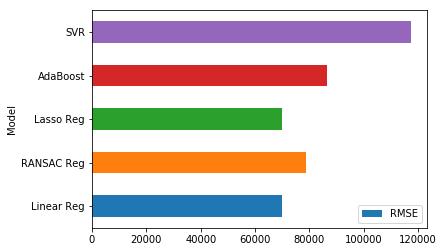

In [74]:
df_score = pd.DataFrame({'Model':['Linear Reg', 'RANSAC Reg', 'Lasso Reg', 'AdaBoost', 'SVR'], 
                         'RMSE':[lr_err, ra_err, la_err, ad_err, sv_err]})
ax = df_score.plot.barh(y='RMSE', x='Model')

Lasso and the Linear Reg are the winners ! Surprisingly the RSME is a little lower for the best models when we keep features such as lat/long and 'total_bedrooms', 'population'.